Epoch 1/50
163/163 [==============================] - 2s 4ms/step - loss: 0.2440 - val_loss: 0.1313
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1543 - val_loss: 0.1141
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1454 - val_loss: 0.1128
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1436 - val_loss: 0.1155
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1416 - val_loss: 0.1138
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1417 - val_loss: 0.1170
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1394 - val_loss: 0.1131
Epoch 8/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1399 - val_loss: 0.1165
Epoch 9/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1394 - val_loss: 0.1207
Epoch 10/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1401 - val_loss: 0.1164

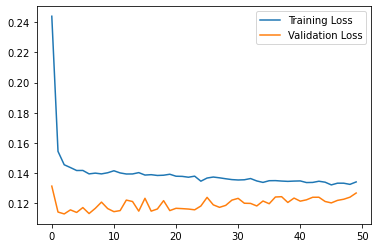

21/21 [==============================] - 0s 1ms/step


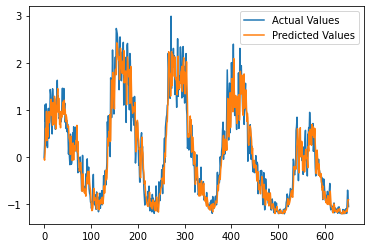

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
# Load the sunspot dataset
df = pd.read_csv('sunspots.csv')
data = df['Monthly Mean Total Sunspot Number'].values
# Normalize the data
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / std
# Create the dataset
sequence_length = 12
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
X = np.array(X)
y = np.array(y)
# Split the dataset into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# Make predictions on the test set
y_pred = model.predict(X_test)
# Plot the predictions against the actual values
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()